In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import re
import seaborn as sns

# Canada housing data

### read in the dataset

In [5]:
housing_df_raw = pd.read_csv("hpi_data.csv")
housing_df = housing_df_raw.\
drop('Month-year', axis=1).\
rename(columns=lambda x: '_'.join(x.lower().split()).rstrip('_').replace(',', '').replace('-', '_'))
housing_df.head()

,unnamed:_0,type,canada,atlantic_region,newfoundland_and_labrador,prince_edward_island,nova_scotia,new_brunswick,quebec,quebec_city_quebec,...,manitoba,saskatchewan,alberta,british_columbia,kelowna_british_columbia,vancouver_british_columbia,victoria_british_columbia,month_year,year,month
0,0,House and Land,38.2,NaN,NaN,NaN,NaN,NaN,NaN,30.1,...,NaN,NaN,NaN,NaN,NaN,90.5,128.7,1981-01-01,1981,1
1,1,House and Land,38.7,NaN,NaN,NaN,NaN,NaN,NaN,30.6,...,NaN,NaN,NaN,NaN,NaN,92.2,130.1,1981-02-01,1981,2
2,2,House and Land,39.3,NaN,NaN,NaN,NaN,NaN,NaN,30.6,...,NaN,NaN,NaN,NaN,NaN,92.2,130.8,1981-03-01,1981,3
3,3,House and Land,39.9,NaN,NaN,NaN,NaN,NaN,NaN,31.0,...,NaN,NaN,NaN,NaN,NaN,91.8,130.8,1981-04-01,1981,4
4,4,House and Land,40.6,NaN,NaN,NaN,NaN,NaN,NaN,31.4,...,NaN,NaN,NaN,NaN,NaN,91.8,132.5,1981-05-01,1981,5


In [6]:
housing_df['type'].unique()

array(['House and Land', 'House only', 'Land only'], dtype=object)

In [7]:
victoria_df = housing_df[[
    'type', 
    'month_year', 
    'canada', 
    'british_columbia',
    'victoria_british_columbia'
]].copy().\
query("~british_columbia.isna()")


# Victoria Analysis

### House and Land

In [8]:
house_and_land_vic_df = victoria_df.copy().query("type == 'House and Land'")

house_and_land_vic_df['month_year'] = pd.to_datetime(house_and_land_vic_df['month_year'])

house_and_land_vic_df.head(-10)

,type,month_year,canada,british_columbia,victoria_british_columbia
60,House and Land,1986-01-01,39.8,66.3,92.6
61,House and Land,1986-02-01,40.3,66.4,92.9
62,House and Land,1986-03-01,40.6,66.4,93.2
63,House and Land,1986-04-01,40.8,66.8,92.7
64,House and Land,1986-05-01,41.1,67.1,92.7
...,...,...,...,...,...
483,House and Land,2021-04-01,114.4,118.9,112.4
484,House and Land,2021-05-01,116.0,120.0,112.7
485,House and Land,2021-06-01,116.7,119.7,113.0
486,House and Land,2021-07-01,117.2,120.3,114.3


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


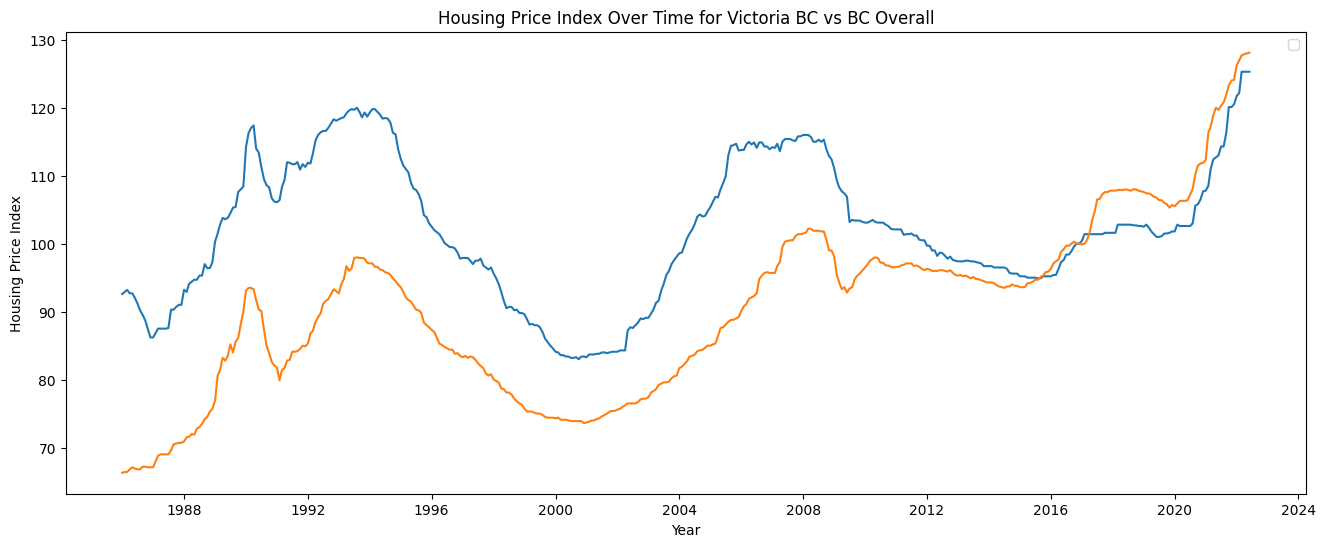

In [9]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(house_and_land_vic_df['month_year'], house_and_land_vic_df['victoria_british_columbia'])
ax.plot(house_and_land_vic_df['month_year'], house_and_land_vic_df['british_columbia'])
ax.set_xlabel('Year')
ax.set_ylabel('Housing Price Index')
ax.set_title('Housing Price Index Over Time for Victoria BC vs BC Overall')
ax.legend()
plt.show()

## Correlation Coefficent for house and land

In [10]:
corr_victoria_to_bc = house_and_land_vic_df['victoria_british_columbia'].corr(house_and_land_vic_df['british_columbia'])
correlation_statement = f"strongly correlated with {corr_victoria_to_bc}" if corr_victoria_to_bc > 0.7 \
    else f"weakly correlated with {corr_victoria_to_bc}"
correlation_statement

'weakly correlated with 0.6421111174201675'